LOADING LIBRARIES AND DATA

In [72]:
###Importing needed libraries 
##Library to navigate paths
import os
##Library for visualizatiobs
import matplotlib.pyplot as plt
import seaborn as sns
##Library for dataframe and numerical manipulation
import numpy as np
import pandas as pd 
import math
##Classical machine learning libraries
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
##Libraries to load data
from sklearn import datasets
from sklearn.datasets import load_iris

In [73]:
###Loading IRIS data
iris = datasets.load_iris()
###Info to learn more about the data
print('The data matrix:\n',iris['data'])
print('The classification target:\n',iris['target'])
print('The names of the dataset columns:\n',iris['feature_names'])
print('The names of target classes:\n',iris['target_names'])
print('The full description of the dataset:\n',iris['DESCR'])
print('The path to the location of the data:\n',iris['filename'])

The data matrix:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5

In [74]:
###Creating a dataframe out of the data for further processing and modelling
X = iris.data 
target = iris.target 
names = iris.target_names
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

In [78]:
##Checking the first five rows of data frame
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
# Check dimensions of datframe
dimensions = df.shape
print(f"Rows: {dimensions[0]}, Columns: {dimensions[1]}")

Rows: 150, Columns: 5


DATA UNDERSTANDING AND CLEANING/SELECTION

In [8]:
#Frequency distribution of species
iris_outcome = pd.crosstab(index=df["species"],  # Make a crosstab
                              columns="count")      # Name the count column
iris_outcome

col_0,count
species,
setosa,50
versicolor,50
virginica,50


In [9]:
# Drop sepal length and sepal width columns
df = df.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
# Rename columns
df = df.rename(columns={'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'})
# Display the updated DataFrame
print(df.head())

   petal_length  petal_width species
0           1.4          0.2  setosa
1           1.4          0.2  setosa
2           1.3          0.2  setosa
3           1.5          0.2  setosa
4           1.4          0.2  setosa


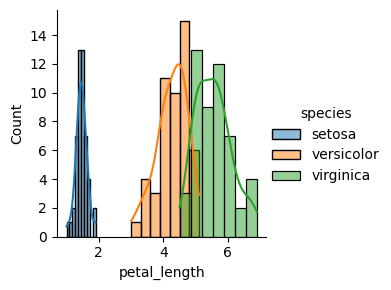

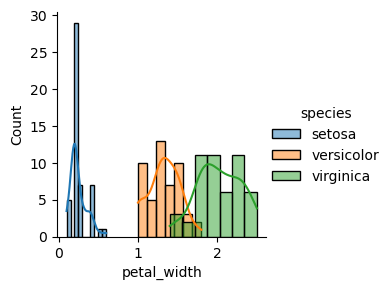

In [10]:
###Visualizaing the 2 features using a histogram 
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "petal_length", kde=True).add_legend()
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "petal_width", kde=True).add_legend()
# Show the plots
plt.show()
###We clearly observe that the median petal_length and petal_width differs for the 3 species. 

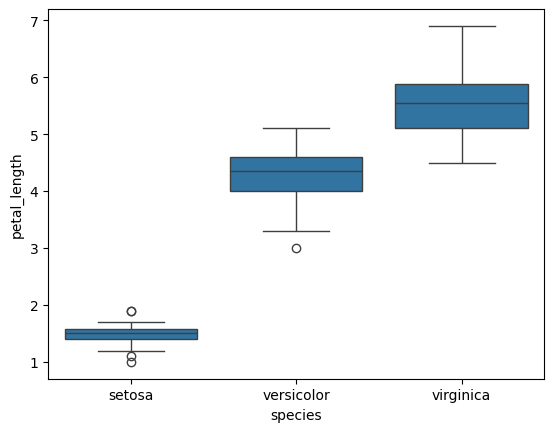

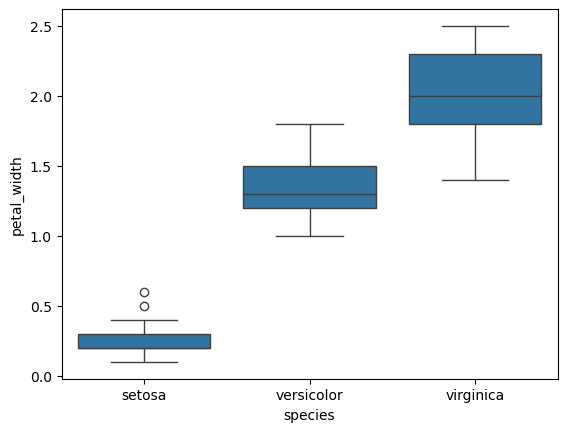

In [11]:
###Visualizing petal length and petal_width using box plots
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()
sns.boxplot(x="species",y="petal_width",data=df)
plt.show()
###We clearly observe that the median petal_length and petal_width differs for the 3 species. 

In [12]:
###Get mean petal length and petal width by species
# Group by species and calculate the mean of petal_length and petal_width
summary_table = df.groupby('species')[['petal_length', 'petal_width']].mean()
# Display the summary table
print(summary_table)
###We observe that the mean petal length and mean petal width differ for the 3 species

            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


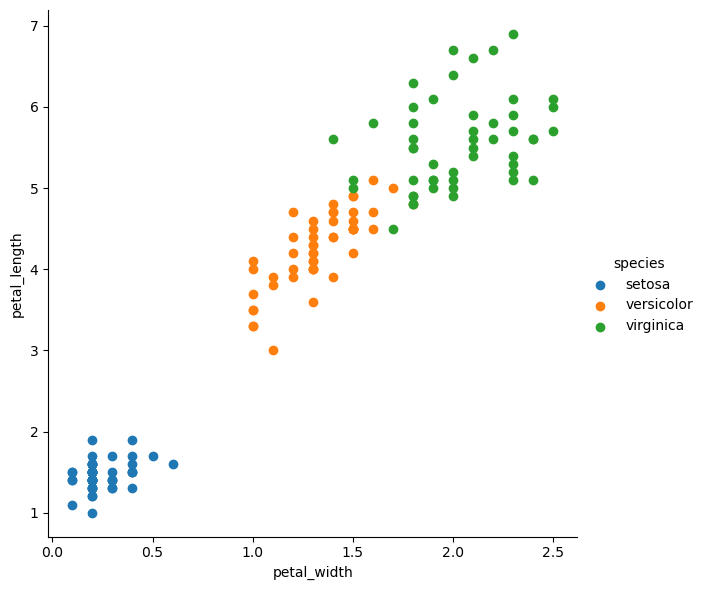

In [13]:
##Scatter plot of petal length and petal width for the 3 species
sns.FacetGrid(df, hue ="species",  height = 6).map(plt.scatter,  'petal_width',  'petal_length').add_legend() 
###From the plot, we observe that the 3 species have distinctive petal lengths and petal widths. 

C:\Users\ghosh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


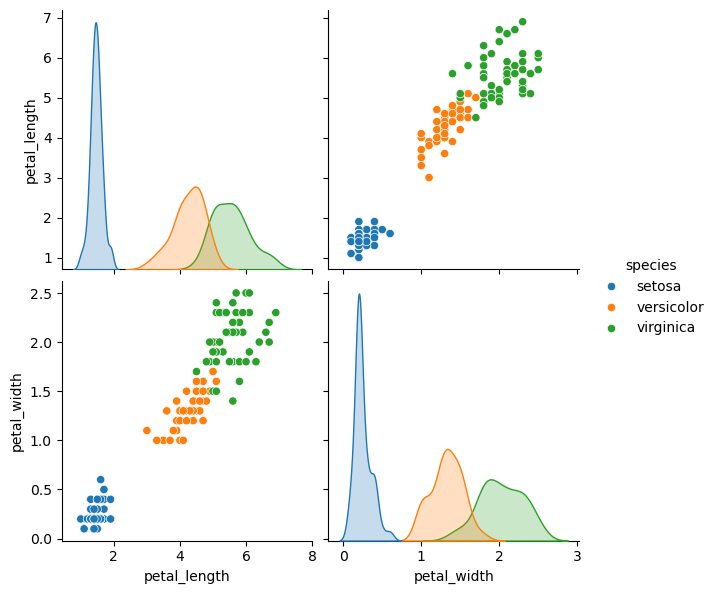

In [14]:
###Visualizing using pair plots
sns.pairplot(df,hue="species",size=3)
####Quick way to summarise what we have already observed from above plots that each species has different petal length and width. 

STANDARDIZATION

In [16]:
###Standardizing the data using Min max normalization using MinMaxScaler function from sklearn.preprocessing class
##This is done to change the values of variables from 0 to 1.
##Standardization is done before KMeans clustering to ensure that each feature contributes equally to the calculation of distances, which is the basis for assigning data points to clusters. 
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
##Select the numeric columns to normalise, all data will be transformed such that minimum value will change to zero and max to 1.
numeric_columns = ['petal_length', 'petal_width']
# Apply MinMaxScaler to the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
# Display the scaled DataFrame
print(df.head())

   petal_length  petal_width species
0      0.067797     0.041667  setosa
1      0.067797     0.041667  setosa
2      0.050847     0.041667  setosa
3      0.084746     0.041667  setosa
4      0.067797     0.041667  setosa


In [17]:
###Check to see if normalization worked
print(np.min(df["petal_length"]))
print(np.max(df["petal_length"]))
print(np.min(df["petal_width"]))
print(np.max(df["petal_width"]))

0.0
1.0
0.0
1.0


KMEANS ALGORITHM

In [19]:
###Using Kmeans Clustering Algorithm with n= 2 clusters
###PARAMETERS IN THE ALGORITHM####
####n_clusters = 2: Sets the number of clusters you want the algorithm to create. In this case, 2 clusters.
####init = 'k-means++': Specifies the method for initializing the centroids. 
##The k-means++ method helps to speed up convergence and improve the final results by choosing initial centroids that are farther apart from each other.
####max_iter = 800: Sets the maximum number of iterations the algorithm will run for a single initialization of centroids. 
##This limits the number of updates to the cluster centers and helps ensure the algorithm doesn’t run indefinitely.
####n_init = 10: Sets the number of times the algorithm will be run with different centroid seeds. 
##The final output is the best result (measured by inertia) from these 10 runs. This helps increase the likelihood of finding a better clustering result.
####random_state = 0: Ensures that the initial random generation of centroids is the same each time the code is run, which makes the results reproducible.
##A different random_state value will yield different clustering results.

In [54]:
##Kmeans Algorithm
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
##Sepaating the data into x variable from class values. 
x = df.iloc[:, [0, 1]].values
###Predicting the cluster for each data point in x
y_kmeans = kmeans.fit_predict(x)

C:\Users\ghosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [56]:
##Observing the output
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


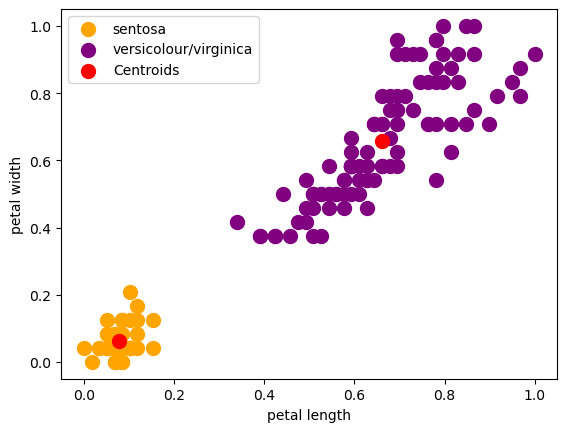

In [58]:
###Visualizing the clusters with their centroids

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'sentosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'versicolour/virginica')
plt.xlabel("petal length")
plt.ylabel("petal width")
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
##We observe that the cluster with minimum petal width and length is classified as cluster 0, , higher length and width as class 1. 
#Logically we can assign labels to these clusters based on domain knowledge gained from visualization and summary statistics

OPTIMIZATION

C:\Users\ghosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ghosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ghosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ghosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

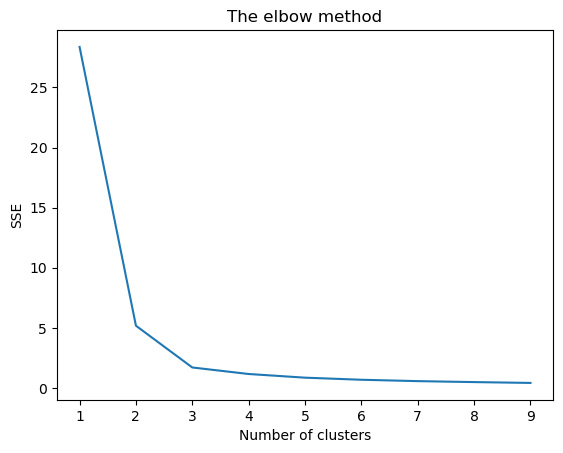

In [24]:
###Using elbow method to determine the best number of clusters for Kmeans. 
##The elbow graph shows the sum-of-square distance (dist between data point and centroid of cluster) values on the y-axis corresponding to the different values of clusters K (on the x-axis).
##The optimal K value is the point at which the graph forms an elbow.
##We want to pick lowest SSE as it indicates the individual data points are closet to their centroids in this case. 
###I am checking SSE for one to 10 clusters because I don't want a large number of clusters and logically the data should have 3 clusters for the 3 species. 

sse = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 10), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') #within cluster sum of squares
plt.show()

###Since SSE is stabilizing at 3 clusters, our hypothesis was correct. 3 is the ideal number of clusters for K-means clustering. 

In [60]:
###KMeans algorithm implementation using n_clusters parameter as 3 in the algorithm

##Sepaating the data into x variable from class values. 
x = df.iloc[:, [0, 1]].values
##Applying Kmeans Algorithhm to data
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 800, n_init = 10, random_state = 0)
###Predicting the cluster for each data point in x
y_kmeans = kmeans.fit_predict(x)


C:\Users\ghosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [62]:
##Observing the output
print(y_kmeans)
###We observe from the output that the algorithm has classified the data into 3 classes 0, 1, and 2. 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


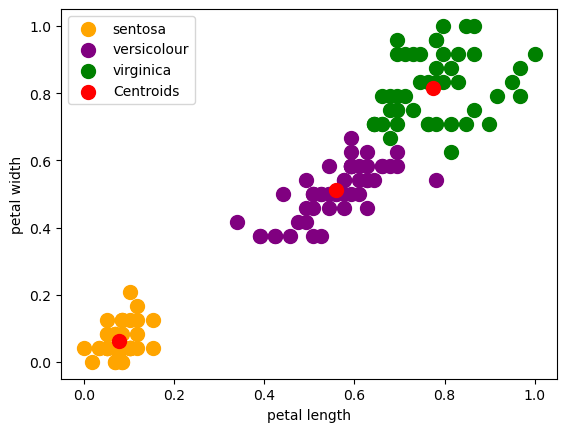

In [64]:
###Visualizing the clusters with their centroids

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'sentosa')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'virginica')
plt.xlabel("petal length")
plt.ylabel("petal width")
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
##We observe that the cluster with minimum petal width and length is classified as cluster 1, medium length and width as class 0, higher length and 
#width as class 2. Logically we can assign labels to these clusters based on domain knowledge gained from visualization and summary statistics. 

In [28]:
# Species names along with Centroid of each colour. We observe that centroid values follow the trends for petal length and width values for each species
##As in centroid of sentosa is least, followed by Versicolour and Lastly Virginica is highest. 
species = ['Versicolour', 'Setosa', 'Virginica']

# Print each species and its corresponding centroid
for i, specie in enumerate(species):
    centroid = kmeans.cluster_centers_[i]
    print(f"Species: {specie}, Centroid: {centroid}")

Species: Versicolour, Centroid: [0.55867014 0.51041667]
Species: Setosa, Centroid: [0.07830508 0.06083333]
Species: Virginica, Centroid: [0.7740113  0.81510417]


In [29]:
###Since the SSE is less than 2.5 for 3 clusters and clusters are meaningful and interpretable based on the dataset's domain, I believe this is a good model. 